In [57]:
from google.colab import drive
drive.mount('/content/gdrive')

%rm -rf '/content/TSAI-EVA5/'
!git clone https://github.com/Anjan-AI/TSAI-EVA5.git
%cp -r TSAI-EVA5/S13/opencv_yolo/. .
%cp '/content/gdrive/My Drive/EVA5/week13/yolov3.weights' './'
!ls


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Cloning into 'TSAI-EVA5'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 9318 (delta 24), reused 32 (delta 8), pack-reused 9267
Receiving objects: 100% (9318/9318), 470.28 MiB | 20.38 MiB/s, done.
Resolving deltas: 100% (504/504), done.
Checking out files: 100% (8505/8505), done.
Avnish	    gdrive	    sample_data  yolov3.cfg
coco.names  opencv_yolo.py  TSAI-EVA5	 yolov3.weights


# Imports

In [58]:
import cv2
import numpy as np


# Load Yolo

In [59]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

#Loading Image

In [76]:
# Loading image
img = cv2.imread("Avnish/with_clock.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting Objects

In [77]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)


# Showing informations on the screen

In [78]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        #print("confidence  = ", confidence)
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)



# Non maximum suppression

In [79]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Extract All Info & Show on Screen

with_book1.jpg	with_book.jpg  with_clock.jpg
even 1
even 1


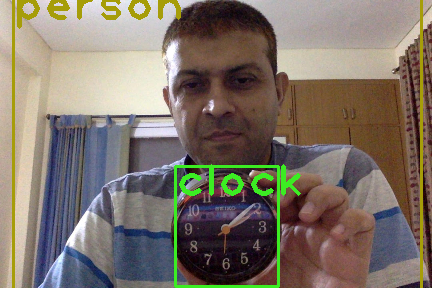

In [80]:
!ls Avnish
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        print("even 1")
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
#cv2.imshow("Avnish/output", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
